# Sentiment Analysis

What you'll learn in this Notebook:

- What sentiment analysis is.
- How it works.
- How to run it yourself.
- How to run it on a dataset and visualise the overall output.


## 1. What is Sentiment Analysis and where is it used?

Sentiment analyis is a computational technique used for analysing text to determine its sentiment, for example, whether the text is positive, negative or neutral.

It is often used in commercial settings (and sometimes called opionion mining) and is applied to social media, online review data or surveys, for example, to determine automatically how customers or people express themselves about different brands or products and to analyse what positive and negative words they use to express themselves.  During times of elections sentiment analysis is also used to determine how people feel about different parties and candidates.

Large amounts of social media data, like Twitter Tweets or Reddits posts, can be analysed in this way to determine trends over time and monitor where things work well or go wrong.

## 2. How does it work?

There are different methods used for performing sentiment analysis.  For example, there are lexicon-lookup methods where each word in a piece of text is checked automatically against a lexicon of postive and negative words to count if any of them appear within it.  The more positive or negative words occur the stronger is the sentiment each way.  In this course you will learn how to use a lexicon-based method.

There are also machine learning and deep learning methods that can be applied to sentiment analysis. This is where data annotated for sentiment by humans is used to train a model which can then be used to classify new data based on what it has learned during training.  We won't cover these approaches in this course but if you are interested in such learning-based methods which are able to consider the context as well as meaning represenations of the words in the text mathematically then check out Lui, 2020 and Agarwal et al., 2020.

- Liu, B., 2020. Sentiment analysis: Mining opinions, sentiments, and emotions. Cambridge University Press. https://doi.org/10.1017/9781108639286
- Agarwal, B., Nayak, R., Mittal, N. and Patnaik, S. eds., 2020. Deep learning-based approaches for sentiment analysis, Singapore: Springer.

## 3. Sentiment Analysis using TextBlob

In this course you'll learn how to use TextBlob for sentiment analysis. It is a python library developed to work with another natural language processing (NLP) tool called the Natural Language Toolkit ([NLTK](https://www.nltk.org)).  NLTK provides access to the lexicons which are required for computing sentiment. So TextBlob uses a lexicon-based approach for performing sentiment analysis.

TextBlob computes sentiment using two values: polarity and subjectivity.  

**Polarity** is a value between 1 and -1. The closer the value is to 1, the more positive the sentiment of the text is.  The closer the value is to -1, the more negative it is.  

**Subjectivity** represents whether a piece of text is more of a personal opinion or something more factural. The subjectivity value lies between 0 and 1.  The closer it is to 1, the more subjective the text is and the closer it is to 0 the more factual it is.

Imagine your friend says to you "I really hate this day. Everything is going wrong." Their sentiment is overall very negative in polarity but their statment is also quite subjective.

Let's see how TextBlob works in action ...

## 4. Running a Sentiment Analyser

### Installing the tool

You first need to install a sentiment analysis tool onto your local computer/laptop.  In this course we're using TextBlob.  To install it you just need to run the following line of code.  Note, this may take a while and will generate some messages (and sometimes warnings) when installing all the libraries that are needed. Once the code cell finishes running move onto the next cell.

In [2]:
!pip install textblob


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python3 -m pip install --upgrade pip


### Importing the tool

Next you have to import the library like this:

In [2]:
from textblob import TextBlob

### Running the tool

You can run TextBlob on piece of text using just one line of code and store the output in the ```blob``` variable:

In [3]:
blob = TextBlob("He's not happy.")

You can see that TextBlob is run by specifying an example sentence ("He's not happy.") in double quotes.  TextBlob computes various things besides sentiment, so to examine what the sentiment is you need to store it in a new variable (e.g. ``` results```), which you can then print:

In [4]:
result = blob.sentiment
print(result)

Sentiment(polarity=-0.4, subjectivity=1.0)


You can also compute sentiment for longer pieces of text. For example, let's check what it is for what our friend said earlier.

In [16]:
blob = TextBlob("I really hate this day. Everything is going wrong.")
result = blob.sentiment
print(result)

Sentiment(polarity=-0.65, subjectivity=0.9)


Look TextBlob classifies these two sentences as fairly negatively in terms of polarity but also as highly subjective.  Now let's try how TextBlob works with negtation.

In [31]:
blob = TextBlob("I'm feeling not bad today.")
result = blob.sentiment
print(result)

Sentiment(polarity=0.3499999999999999, subjectivity=0.6666666666666666)


It seems to recognise that there is negation in the sentence. Now try some other examples to see if that's always the case.

### 🐛 Mini task 4.1

Try out your own examples. Use the code from the previous code cell but replace it with a different string of text, for example, "Your pizzas are the best." .

In [6]:
# Write your solution here ...

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION

blob = TextBlob("Your pizzas are the best.")
result = blob.sentiment
print(result)

    ### END SOLUTION
    
</details>

## 5. Running TextBlob on our data

### Loading the data

We now need to load our dataset into the notebook so that we can analyse it. We have put Act Three of the script into the data directory for you. Take a look in the Jupyter Notebook directory to see that you can find it. It's called ```Babysitting-Act3-cleaned.tsv```.

To load the file, we will use a library called pandas. It can be used to read CSV and TSV files and store their information in column format.

In [8]:
import pandas as pd

Our file contains two columns, the name of the speaker and what each speaker said, so the transcript text.

Pandas let's us read in the file as a data frame (like a table) using the ```read_table``` function. 

We can specify the names of the columns using the ```colnames``` variable and the column separator ```sep``` (set to "t" for tab in this case).

We store this table in the ```df``` variable, short for data frame.

We also specify that the values in the text and speaker columns are strings.  We need to do this as TextBlob only runs on strings as input.

The last line (```df.head()```) of code shows the header and the first five rows of the data frame we just created and loaded in pandas. Yeah.

In [47]:
# Reading in the file as a table using pandas
colnames=['speaker', 'text'] 
df = pd.read_table("./data/Babysitting-Act3-cleaned.tsv", sep="\t", names=colnames)
df['text'] = df['text'].astype(str)
df['speaker'] = df['speaker'].astype(str)
df.head()

,speaker,text
0,@Ira Glass,This is a story that caught our interest becau...
1,@Myron Jones,"She had to say exactly where she was going, wh..."
2,@Ira Glass,"If one were to ask your mother at the time, wh..."
3,@Myron Jones,She said you've got to be more careful with th...
4,@Ira Glass,Yeah.


Because the speakers speak longer and shorter utterances, let's split the transcript into sentences before computing sentiment.

The following bit of code is a simple sentence splitter which splits each transcipt at punctuation marks and expands the data frame to include one row for each sentence which each speaker said.

The last line instructs to print the first 25 rows of the data frame.

In [48]:
s = (df.pop('text')
    .str.strip('.')
    .str.strip('?')
    .str.strip('!')
    .str.split('[\.\?\!]\s+', expand=True)
    .stack()
    .rename('text')
    .reset_index(level=1, drop=True))

df = df.join(s).reset_index(drop=True)
df.head(25)

,speaker,text
0,@Ira Glass,This is a story that caught our interest becau...
1,@Ira Glass,A man in Florida named Myron Jones wrote us th...
2,@Ira Glass,"He said that when he was 16 years old, growing..."
3,@Ira Glass,He came and went as he pleased
4,@Ira Glass,"Spent a lot of time in bars, actually"
5,@Ira Glass,This was the 1940s
6,@Ira Glass,"But his sister Carol, she had different rules,..."
7,@Ira Glass,"This story gets to babysitting in a big, big way"
8,@Ira Glass,And I called him to talk about it
9,@Myron Jones,"She had to say exactly where she was going, wh..."


You can see an index for each line in the table on the left as well as the two columns, speaker and text.

In [50]:
df.describe()

,speaker,text
count,364,364
unique,3,354
top,@Myron Jones,Yeah
freq,200,6


You can use the ```describe()``` function to give you a summary of what's in the table. When you run the next line of code you will see that the table contains 364 rows and there are three unique speakers.  The speaker uttering the most sentences is Myron Jones and the most frequent bit of spoken text is ```Yeah```. Yeah. :-)

The text is what we want to compute sentiment for. Let's do it.

### Computing sentiment 

We will now compute the sentiment for each row of text.

To do this we use two lambda functions to determine the polarity and subjectivity for each line of text in the data frame.

**Lambda function** is a small anonymous function in Python.  It can take any number of arguments, but can only have one expression.

We apply the lambda functions to each text cell in the data frame and store their results in the data frame as two additional columns called polarity and subjectivity.

In [51]:
# Computing polarity and subjectivity for each line in the 'text' column
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['text'].apply(polarity)
df['subjectivity'] = df['text'].apply(subjectivity)

### 🐛 Minitask 5.1 

Now check how the first few lines of the data frame look like.  Remember you can use the ```head()``` function to do this.

In [52]:
# Write your solution here ...


<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION

 df.head()
 
    ### END SOLUTION
    
</details>

## 6. Visualising sentiment

Now let's visualise sentiment so that we can display and understand the results a bit better.

### Visualising each result by colour

The following line of code visualises the polarity and subjectivity in the table using colours. It's quite a long line of code but all it does is set a colour background to the cells containing the sentiment scores.

Polarity is displayed as a colour ranging between red, yellow and green, <font color="red">red</font> signaling negative sentiment, <font color="green">green</font> signalling positive sentiment and <font color="gold">light orange</font> being neutral.  Subjectivity is displayed on a gray scale with white signalling factual statements and black subjective ones.  

In [53]:
df.style.background_gradient(subset='polarity', cmap='RdYlGn', axis=None).background_gradient(subset=['subjectivity'], cmap='Greys', axis=None)

,speaker,text,polarity,subjectivity
0,@Ira Glass,"This is a story that caught our interest because of babysitting, but then it ended up being about so many other things besides",0.187500,0.437500
1,@Ira Glass,A man in Florida named Myron Jones wrote us this letter,0.000000,0.000000
2,@Ira Glass,"He said that when he was 16 years old, growing up without a dad in Buffalo, New York, he was allowed to stay out till midnight",0.118182,0.327273
3,@Ira Glass,He came and went as he pleased,0.500000,1.000000
4,@Ira Glass,"Spent a lot of time in bars, actually",-0.050000,0.100000
5,@Ira Glass,This was the 1940s,0.000000,0.000000
6,@Ira Glass,"But his sister Carol, she had different rules, and she wasn't let out of the house at all, even though she was older than Myron",0.083333,0.466667
7,@Ira Glass,"This story gets to babysitting in a big, big way",0.000000,0.100000
8,@Ira Glass,And I called him to talk about it,0.000000,0.000000
9,@Myron Jones,"She had to say exactly where she was going, who she was going with",0.250000,0.250000


### 🐛 Mini task 6.1

Look at a few individual results and check why they might be either positive or negative by looking at the vocabulary used. Can you spot any examples where the sentiment analysis looks accurate or where it went wrong?

### Visualising sentiment in one graph

We will now display the sentiment results for the entire data set in one graph. We'll plot polarity on the x-axis and subjectivity on the y-axis.

You don't need to understand the following bit of code in detail, though I've added some explanations in the comments.  One thing to know is that we use a library called ```matplotlib``` for creating the graphs. The does is go through the data frame to collect all the scores, store them in a list and display them on the graph with each bit of text as one polarity/subjectivity coordinate.

The code also keeps track whenever the same coordinates are repeated so that pairs which occur frequently will be displayed larger.

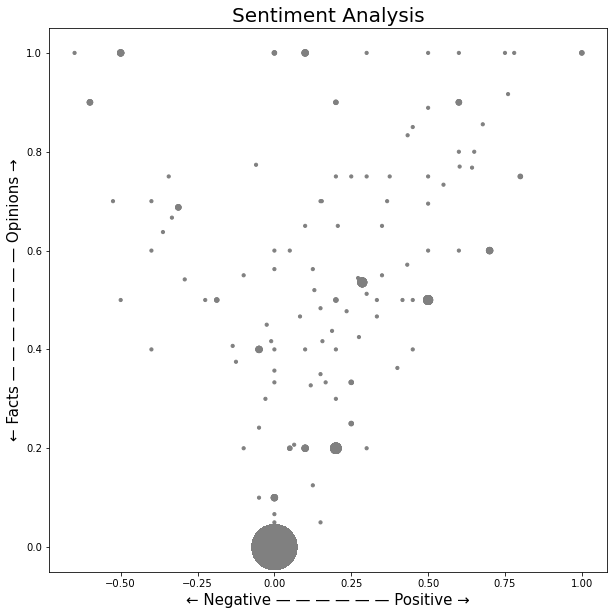

In [54]:
# Visualising the results in one graph showing:
# subjectivity on the y-axis
# polarity on the x-axis

# import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# set up the size of the figure
plt.rcParams['figure.figsize'] = [10, 10]

# create two empty lists for the x and y coordinates
x=[]
y=[]

# add the polarity values as x coordinates and
# the subjectivity values as the y coordinates
for (index, row) in df.iterrows():
    x.append(row.loc['polarity'])
    y.append(row.loc['subjectivity'])

# increase the dot size in case there are multiple coordinate pairs
from collections import Counter
# count the occurrences of each point
c = Counter(zip(x,y))
# create a list of the sizes, here multiplied by 10 for scale
s = [10*c[(xx,yy)] for xx,yy in zip(x,y)]

# make the scatter plot using gray as the colour for each dot
plt.scatter(x, y, s, color='Gray')

# specify the title
plt.title('Sentiment Analysis', fontsize = 20)

# set lables on axes
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)

# show the plot
plt.show()

Assuming that the sentiment analysis performs more or less correctly, we can conclude from this graph that, aside from the neutral utterances, the dataset is tending towards beeing slightly more positive than negative and it's slightly more subjective than factual.

When companies do this kind of analysis they will be interested in these kind of trends and how they change over time but they will also want to see examples of particular outliers to see what customers are happy or unhappy about in terms of products and services.

When doing literary analysis, we want to go further and examine sentiment by character or speaker. As we know the speaker for each bit of text in the data set, we can do this very easily.

### Visualising sentiment by speaker

Here we create the same graph but using a different colour for each speaker.  Our data set contains three speakers: <font color="purple">Ira Glass</font>, <font color="orange">Myron Jones</font> and <font color="green">Carol Jones</font>.

You don't need to understand the following bit of code in detail, though I've added some explanations in the comments.  Essentially the only difference to the previous cell is that the code collects the data by speaker first before it plots it in the different colours.

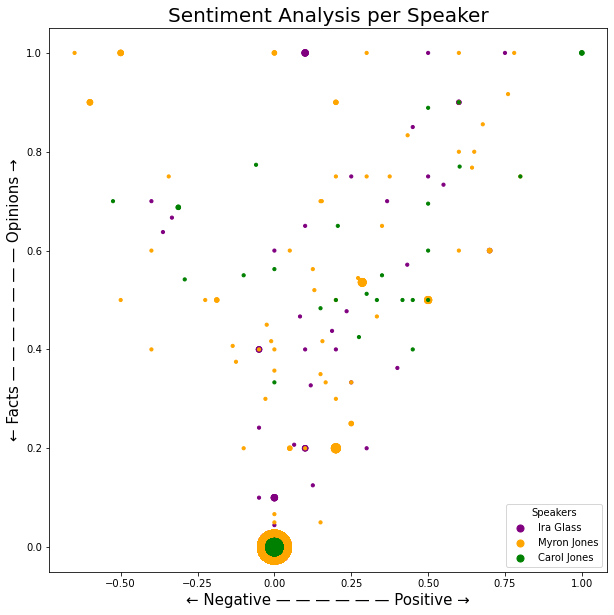

In [55]:
# Sentiment analysis by speaker

# set up the size of the figure
plt.rcParams['figure.figsize'] = [10, 10]

# create empty x and y coordinate lists for each of the three speakers
ira_x=[]
ira_y=[]
myron_x=[]
myron_y=[]
carol_x=[]
carol_y=[]

# loop through the data frame and assign the x and y coordinates
# to the correct list depending on the speaker
for (index, row) in df.iterrows():
    x=row.loc['polarity']
    y=row.loc['subjectivity']
    speaker=row.loc['speaker']
    if speaker == "@Ira Glass":
        ira_x.append(x)
        ira_y.append(y)
    elif speaker == "@Myron Jones":
        myron_x.append(x)
        myron_y.append(y)
    elif speaker == "@Carol Jones":
        carol_x.append(x)
        carol_y.append(y)

# function to increase the dot size in case there are multiple coordinate pairs      
def getSize(x,y):
    # count the occurrences of each point
    c = Counter(zip(x,y))
    # create a list of the sizes, here multiplied by 10 for scale
    s = [10*c[(xx,yy)] for xx,yy in zip(x,y)]
    return s

# create scatter plots per speaker
ira = plt.scatter(ira_x, ira_y, s=getSize(ira_x,ira_y), color='Purple')
myron = plt.scatter(myron_x, myron_y, s=getSize(myron_x,myron_y), color='Orange')
carol = plt.scatter(carol_x, carol_y, s=getSize(carol_x,carol_y), color='Green')

# specify the title
plt.title('Sentiment Analysis per Speaker', fontsize = 20)

# set lables of axes
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)

# add legend
lgnd = plt.legend((ira, myron, carol),
           ('Ira Glass', 'Myron Jones', 'Carol Jones'),
           loc='lower right')
lgnd.set_title("Speakers")
for handle in lgnd.legendHandles:
    handle.set_sizes([50.0])

# show the plot
plt.show()

You can see that Carol is slightly more positive and subjective than Ira and Myron, although she's also speaking the least. You can work this out mathematically by determining the average scores per speaker and plot them in a bar plot. This is done by grouping the data frame by speaker and polarity (or subjectivity) using the ```groupby()``` function. We'll first plot mean polarity scores.

<AxesSubplot:title={'center':'Mean Polarity Scores'}, xlabel='Speaker', ylabel='Polarity'>

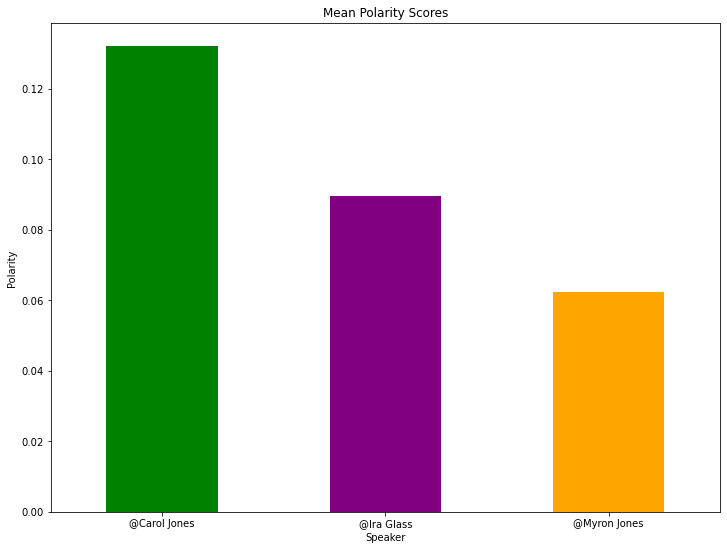

In [56]:
#generate mean of sentiment score per speaker
dfg = df.groupby(['speaker'])['polarity'].mean()

#create a bar plot
dfg.plot(color=['Green', 'Purple', 'Orange'], kind='bar', title='Mean Polarity Scores', ylabel='Polarity',
         xlabel='Speaker', figsize=(12, 9), rot=0)

You can also plot the sentiment as a histogram and get a better idea of distribution of the scores per speaker. This shows that Carol Jones is most spread out in terms of her polarity, Myron Jones is saying mostly neutral to slightly positive things. Ira Glass is mostly neutral which makes sense, her being the interviewer. You can see how this kind of analysis can be used to build up profiles of characters.

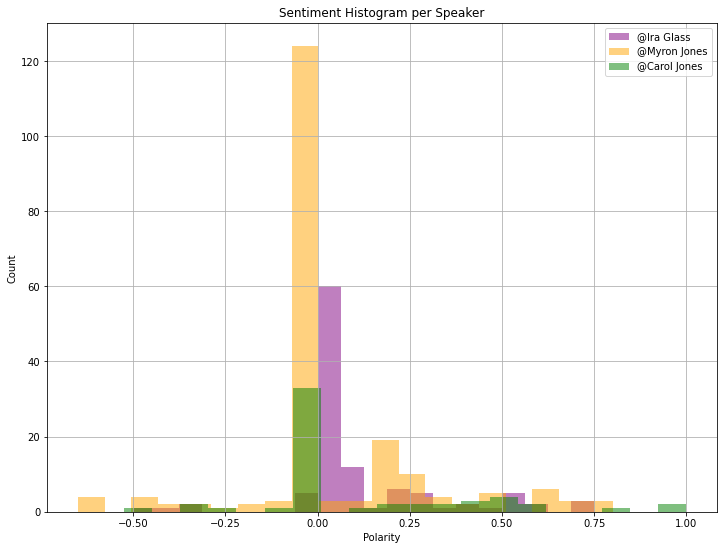

In [57]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

speakers = ['@Ira Glass','@Myron Jones','@Carol Jones']
colours = ['Purple','Orange','Green']

for index, speaker in enumerate(speakers):
    df[df['speaker']==speaker]['polarity'].hist(ax=ax1, bins=20, color=colours[index], label=speaker, alpha=0.5)

plt.title('Sentiment Histogram per Speaker')
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.legend()
plt.show()

### 🦋 Extra task 6.2 (optional): 

If you have finished everything else already, display the last two graphs but for subjectivity. Remember to adjust the title and axes labels appropriately.

In [34]:
# Write your solution for the mean subjectivity bar plot here ...


<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION

 dfg = df.groupby(['speaker'])['subjectivity'].mean()

 dfg.plot(color=['Green', 'Purple', 'Orange'], kind='bar', title='Mean Subjectivity Scores', ylabel='Subjectivity', xlabel='Speaker', figsize=(12, 9), rot=0)

    ### END SOLUTION
    
</details>

In [ ]:
# Write your solution for the subjectivity histogram here ...


<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

speakers = ['@Ira Glass','@Myron Jones','@Carol Jones']
colours = ['Purple','Orange','Green']

for index, speaker in enumerate(speakers):
    df[df['speaker']==speaker]['subjectivity'].hist(ax=ax1, bins=20, color=colours[index], label=speaker, alpha=0.5)

plt.title('Sentiment Histogram per Speaker')
plt.xlabel("Subjectivity")
plt.ylabel("Count")
plt.legend()
plt.show()

    ### END SOLUTION
    
</details>